### The hypothesis is that car mileage is  effected by factors like car weight, engine horsepower. So we aim to develop an linear equation that would allow to predict the car mileage

In [2]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [ ]:
### Description of variables###
# mpg 	Miles/(US) gallon
# cyl 	Number of cylinders
# disp 	Displacement (cu.in.)
# hp 	Gross horsepower
# drat 	Rear axle ratio
# wt 	Weight (lb/1000)
# qsec 	1/4 mile time
# vs 	V/S
# am 	Transmission (0 = automatic, 1 = manual)
# gear 	Number of forward gears
# carb 	Number of carburetors

In [3]:
# Step 1: 
# assign data set to a dataframe name cars
cars <- mtcars

In [4]:
#structure of cars data frame
str(cars)


'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [5]:
# descriptive and univariate analysis
with(cars,{summary(cars$cyl)})

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   4.000   6.000   6.188   8.000   8.000 

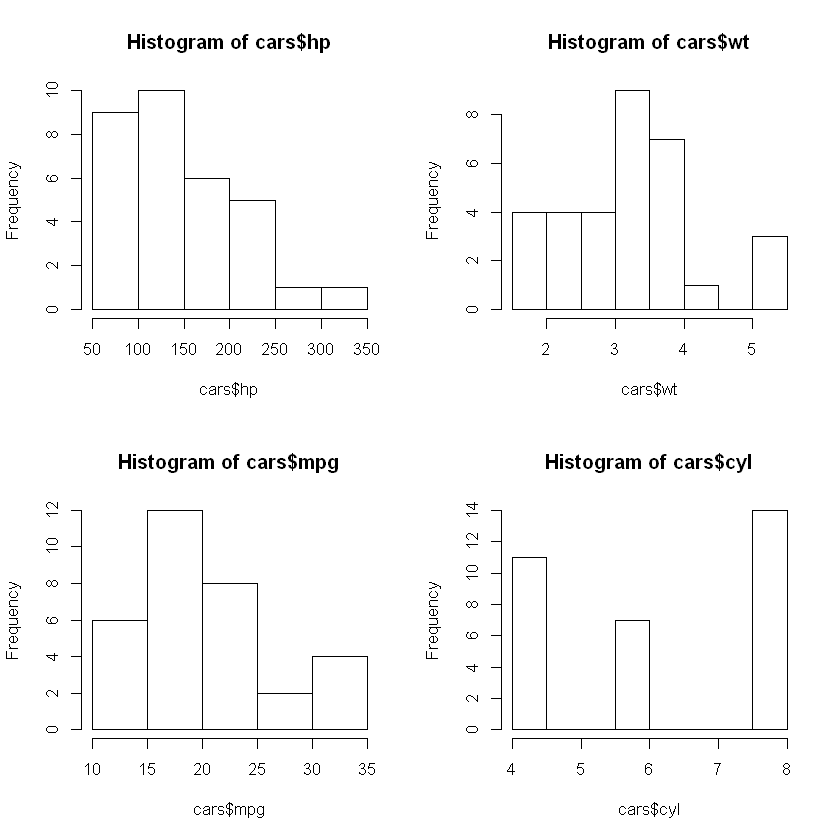

In [7]:
# Descriptive and univariate analysis, analysing the distrbution of data in each attribute: horspower, weight,miles per gallon
# and number of cylinders

# here our task is to identify the skew of the distribution and infer any interesting insights and make notes

par(mfrow= c(2,2))
with(cars,{
hist(cars$hp)  # histogram of horsepower
hist(cars$wt)  # histogram of weights of cars
hist(cars$mpg) # histogram of mileage data
hist(cars$cyl) # histogram of number of engine cylinders
})

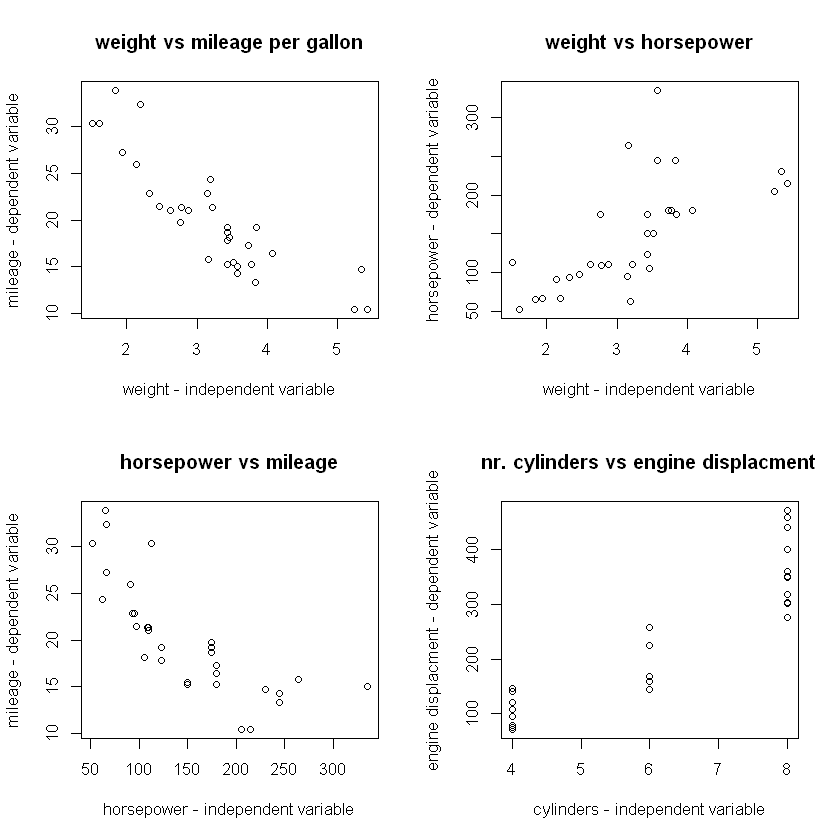

In [8]:
# Step 2: Trying to understand the relationship between variables using bivariate analysis steps
# create a scatter plot to understand the relationship between weight and mileage
# create a scatter plot to understand the relationship between weight and horsepower
# create a scatter plot to understand the relationship between horsepower and mileage 
# create a scatter plot to understand the relationship between number of cyalinders and engine displacment 
par(mfrow=c(2,2))
plot(cars$wt, cars$mpg, xlab = "weight - independent variable", ylab = "mileage - dependent variable", main = "weight vs mileage per gallon")
plot(cars$wt, cars$hp, xlab = "weight - independent variable", ylab = "horsepower - dependent variable", main = "weight vs horsepower")
plot(cars$hp, cars$mpg, xlab = "horsepower - independent variable", ylab = "mileage - dependent variable", main = "horsepower vs mileage")
plot(cars$cyl, cars$disp, xlab = "cylinders - independent variable", ylab = "engine displacment - dependent variable", main = "nr. cylinders vs engine displacment")


In [16]:
# if you want to quantify the linear relations
# The correlation coefficient of two variables in a data set 
# equals to their covariance divided by the product of their
# individual standard deviations. It is a normalized measurement 
# of how the two are linearly related
# correlation of +1 indicates a strong positive linear relationship
# correlation of 0 indicates no linear relationship
# coreelation of -1 indicates a strong negative relationship

par(mfrow=c(2,2))
cor(cars$wt, cars$mpg) # indicates a negative linear relationship
cor(cars$hp, cars$disp) # indicates a positive linear relationsip
cor(cars$wt, cars$drat)
cor(cars$drat, cars$mpg)


[1] -0.8676594

[1] 0.7909486

[1] -0.7124406

[1] 0.6811719

In [18]:
# identify variables we could we use for Linear regression analysis
# lets convert nominal numerical data into factors
print(mtcars)
cars$am <- as.factor(cars$am) # "am" variable has nominal values 0 - automatic transmission  and 1 - manual transmission
levels(cars$am) <- c("Auto-Transmission", "Manual-Transmission")


                     mpg cyl  disp  hp drat    wt  qsec vs am gear carb
Mazda RX4           21.0   6 160.0 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag       21.0   6 160.0 110 3.90 2.875 17.02  0  1    4    4
Datsun 710          22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive      21.4   6 258.0 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout   18.7   8 360.0 175 3.15 3.440 17.02  0  0    3    2
Valiant             18.1   6 225.0 105 2.76 3.460 20.22  1  0    3    1
Duster 360          14.3   8 360.0 245 3.21 3.570 15.84  0  0    3    4
Merc 240D           24.4   4 146.7  62 3.69 3.190 20.00  1  0    4    2
Merc 230            22.8   4 140.8  95 3.92 3.150 22.90  1  0    4    2
Merc 280            19.2   6 167.6 123 3.92 3.440 18.30  1  0    4    4
Merc 280C           17.8   6 167.6 123 3.92 3.440 18.90  1  0    4    4
Merc 450SE          16.4   8 275.8 180 3.07 4.070 17.40  0  0    3    3
Merc 450SL          17.3   8 275.8 180 3.07 3.730 17.60  0  0   

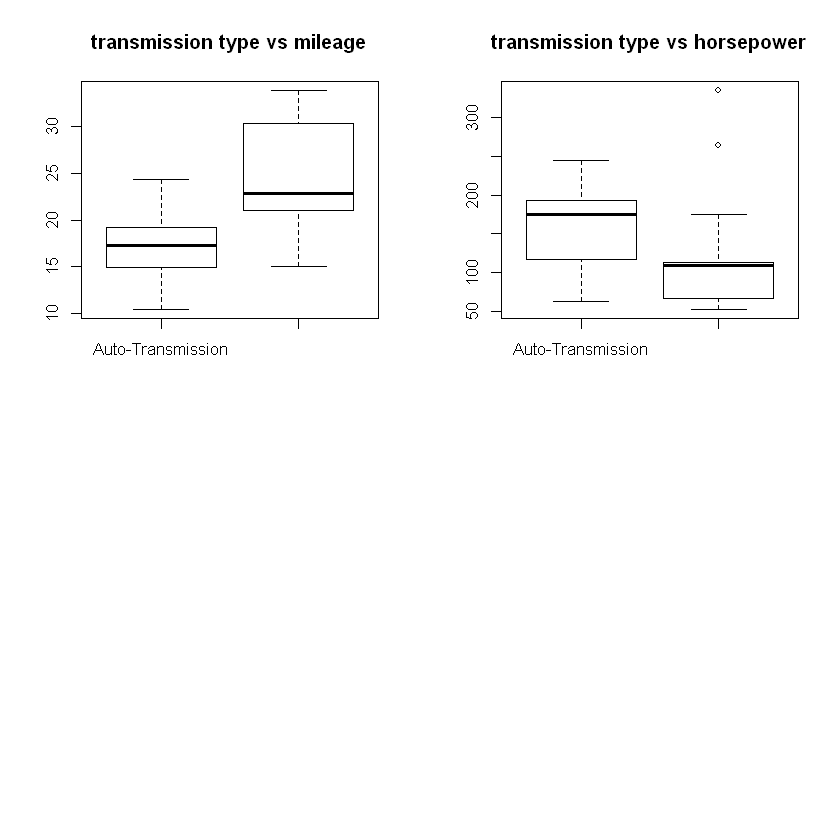

In [42]:
# identify which category of cars i.e. auto or manual transmission have low median mileages

par(mfrow=c(2,2))
boxplot(cars$mpg~cars$am, main="transmission type vs mileage")
boxplot(cars$hp~cars$am, main = "transmission type vs horsepower")


Call:
lm(formula = mpg ~ wt, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


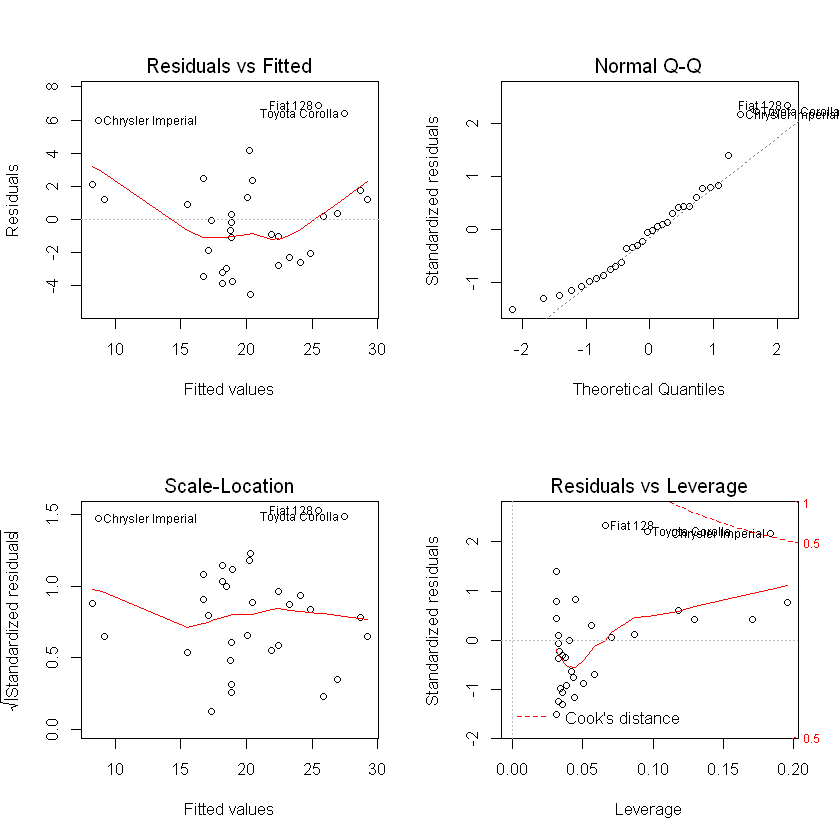

In [43]:
# Applying linear regression model to predict car mileage
#y = mx + c   :   equation of the regression line or best fit line.where 'm' is the slope of the line and 'c' is the y-intercept.
# developing a model with single independent and a dependent variable
#The model above is achieved by using the lm() function in R and 
#the output is called using the summary() function on the model.
# reference:www.dummies.com/education/math/statistics/how-to-calculate-a-regression-line/
# reference:docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/ 
par(mfrow=c(2,2))
lm_single <- lm(mpg~wt, data=cars)
summary(lm_single) # print linear model output
plot(lm_single)



In [ ]:
# Derive linear model interpreting the summary results
# docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/
# Y = a + m1*X1 + m2*X2 + ... + mp*Xp
# developing a model with multiple independent and a dependent variable
# identify values for intercept 
# identify weight coefficient estimate
# ping in the values in y=mx+c
# here X is the known independent value like the weight of the car
# Y is unknown dependent value
# 'C' is the intercept value
# 'm' is the slope or regression coefficient
# make sure your unknown predicted value is within the weight range of the cars in the dataset

In [21]:
mean(cars$wt)

[1] 3.21725

In [25]:
#let plug in the mean weight value in to equation y=mx+c to predict mileage of car when its weight 3.2175 lbs
y <- (3.2175*-5.3445)+37.2851
cat("the predicted mileage is:",y )


the predicted mileage is: 20.08917

In [24]:
print(cars) # compare mileage for similar car weight value

                     mpg cyl  disp  hp drat    wt  qsec vs                  am
Mazda RX4           21.0   6 160.0 110 3.90 2.620 16.46  0 Manual-Transmission
Mazda RX4 Wag       21.0   6 160.0 110 3.90 2.875 17.02  0 Manual-Transmission
Datsun 710          22.8   4 108.0  93 3.85 2.320 18.61  1 Manual-Transmission
Hornet 4 Drive      21.4   6 258.0 110 3.08 3.215 19.44  1   Auto-Transmission
Hornet Sportabout   18.7   8 360.0 175 3.15 3.440 17.02  0   Auto-Transmission
Valiant             18.1   6 225.0 105 2.76 3.460 20.22  1   Auto-Transmission
Duster 360          14.3   8 360.0 245 3.21 3.570 15.84  0   Auto-Transmission
Merc 240D           24.4   4 146.7  62 3.69 3.190 20.00  1   Auto-Transmission
Merc 230            22.8   4 140.8  95 3.92 3.150 22.90  1   Auto-Transmission
Merc 280            19.2   6 167.6 123 3.92 3.440 18.30  1   Auto-Transmission
Merc 280C           17.8   6 167.6 123 3.92 3.440 18.90  1   Auto-Transmission
Merc 450SE          16.4   8 275.8 180 3.07 4.070 17

In [34]:
predicted_mpg <- predict(lm_single, data=cars)  #use this linear model to predict mileage values for existing data in cars dataframe
print (predicted_mpg)
calculate_residual_values <- cbind(cars$mpg, predicted_mpg)
# spot the differences betwwen actual values and observed values these are call residual values

          Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
          23.282611           21.919770           24.885952           20.102650 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
          18.900144           18.793255           18.205363           20.236262 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
          20.450041           18.900144           18.900144           15.533127 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
          17.350247           17.083024            9.226650            8.296712 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
           8.718926           25.527289           28.653805           27.478021 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
          24.111004           18.472586           18.926866           16.762355 
   Pontiac Firebird         

In [35]:
print(calculate_residual_values)

                         predicted_mpg
Mazda RX4           21.0     23.282611
Mazda RX4 Wag       21.0     21.919770
Datsun 710          22.8     24.885952
Hornet 4 Drive      21.4     20.102650
Hornet Sportabout   18.7     18.900144
Valiant             18.1     18.793255
Duster 360          14.3     18.205363
Merc 240D           24.4     20.236262
Merc 230            22.8     20.450041
Merc 280            19.2     18.900144
Merc 280C           17.8     18.900144
Merc 450SE          16.4     15.533127
Merc 450SL          17.3     17.350247
Merc 450SLC         15.2     17.083024
Cadillac Fleetwood  10.4      9.226650
Lincoln Continental 10.4      8.296712
Chrysler Imperial   14.7      8.718926
Fiat 128            32.4     25.527289
Honda Civic         30.4     28.653805
Toyota Corolla      33.9     27.478021
Toyota Corona       21.5     24.111004
Dodge Challenger    15.5     18.472586
AMC Javelin         15.2     18.926866
Camaro Z28          13.3     16.762355
Pontiac Firebird    19.2 

In [37]:
residual_values <- cars$mpg - predicted_mpg
print(residual_values)

          Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
         -2.2826106          -0.9197704          -2.0859521           1.2973499 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
         -0.2001440          -0.6932545          -3.9053627           4.1637381 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
          2.3499593           0.2998560          -1.1001440           0.8668731 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
         -0.0502472          -1.8830236           1.1733496           2.1032876 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
          5.9810744           6.8727113           1.7461954           6.4219792 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
         -2.6110037          -2.9725862          -3.7268663          -3.4623553 
   Pontiac Firebird         

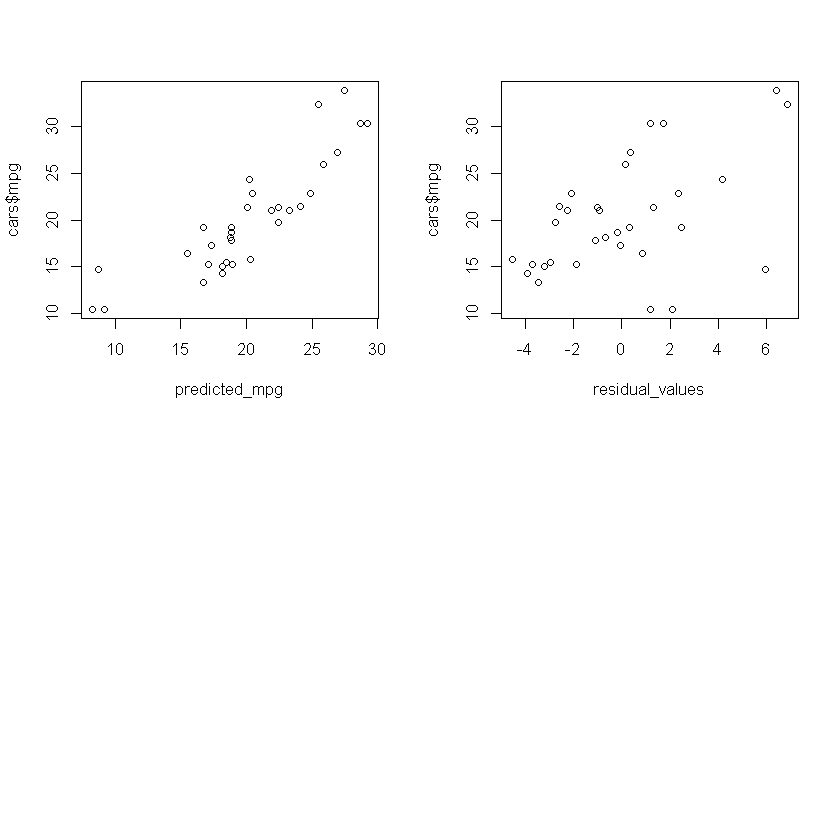

In [51]:
par(mfrow=c(2,2))
plot(cars$mpg~predicted_mpg)
plot(cars$mpg~residual_values)
